In [125]:
# Kütüphaneleri import ettik
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [126]:
# Veriyi okuduk
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/audi.csv")

In [127]:
df # Verinin genel görünüşüne baktık

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0
...,...,...,...,...,...,...,...,...,...
10663,A3,2020,16999,Manual,4018,Petrol,145,49.6,1.0
10664,A3,2020,16999,Manual,1978,Petrol,150,49.6,1.0
10665,A3,2020,17199,Manual,609,Petrol,150,49.6,1.0
10666,Q3,2017,19499,Automatic,8646,Petrol,150,47.9,1.4


In [128]:
def genel_bilgiler(df):
    print("---------------Boyut bilgisi-------------------- ")
    print(df.shape)
    print("--------------Veri tipi bilgisi---------------------")
    print(df.dtypes)
    print("-------------İlk 5 satır----------------------")
    print(df.head())
    print("---------------Boş değer var mı?----------------------")
    print(df.isnull().sum())
    print("----------------İstatistiksel özet----------------------")
    print(df.describe())


In [129]:
genel_bilgiler(df)

---------------Boyut bilgisi-------------------- 
(10668, 9)
--------------Veri tipi bilgisi---------------------
model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
dtype: object
-------------İlk 5 satır----------------------
  model  year  price transmission  mileage fuelType  tax   mpg  engineSize
0    A1  2017  12500       Manual    15735   Petrol  150  55.4         1.4
1    A6  2016  16500    Automatic    36203   Diesel   20  64.2         2.0
2    A1  2016  11000       Manual    29946   Petrol   30  55.4         1.4
3    A4  2017  16800    Automatic    25952   Diesel  145  67.3         2.0
4    A3  2019  17300       Manual     1998   Petrol  145  49.6         1.0
---------------Boş değer var mı?----------------------
model           0
year            0
price           0
transmission    0
mileage         0
fuelType      

In [131]:
df.corr()["price"].sort_values() # Veriler arası ilişkiye Korelasyon yardımıyla baktık

<ipython-input-131-375315354627>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()["price"].sort_values() # Veriler arası ilişkiye Korelasyon yardımıyla baktık


mpg          -0.600334
mileage      -0.535357
tax           0.356157
engineSize    0.591262
year          0.592581
price         1.000000
Name: price, dtype: float64

<ipython-input-132-d7dbcdc4e35d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["price"])


<Axes: xlabel='price', ylabel='Density'>

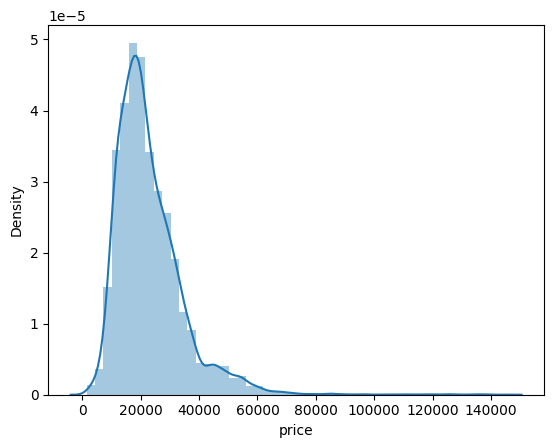

In [132]:
sns.distplot(df["price"])

10427    1997
9788     1998
9523     2002
10108    2002
10588    2003
         ... 
6092     2020
4783     2020
5259     2020
6103     2020
5213     2020
Name: year, Length: 10668, dtype: int64

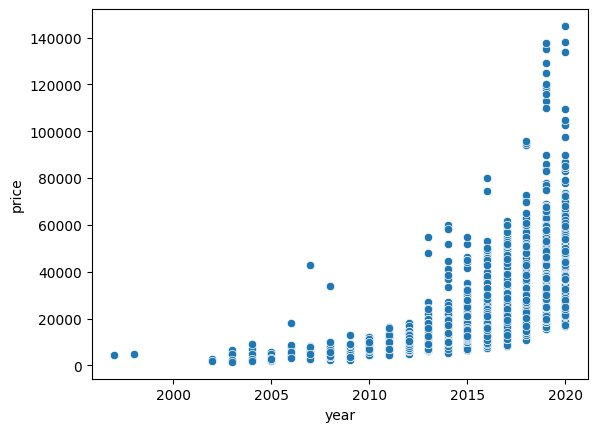

In [133]:
sns.scatterplot(x="year", y="price", data=df)
df["year"].sort_values()

In [134]:
df.sort_values("price", ascending=False).head(20)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
4783,R8,2020,145000,Semi-Auto,2000,Petrol,145,21.1,5.2
2255,R8,2020,137995,Semi-Auto,70,Petrol,145,21.1,5.2
4179,R8,2019,137500,Semi-Auto,10,Petrol,150,21.4,5.2
3367,R8,2019,135000,Automatic,1000,Petrol,145,32.8,5.2
5459,R8,2020,133900,Semi-Auto,333,Petrol,145,21.4,5.2
1646,R8,2019,129000,Semi-Auto,4000,Petrol,145,21.4,5.2
10468,R8,2019,125000,Automatic,13663,Petrol,150,21.4,5.2
4925,R8,2019,125000,Semi-Auto,500,Petrol,145,21.4,5.2
3359,R8,2019,125000,Automatic,100,Petrol,145,24.1,5.2
7445,R8,2019,119995,Semi-Auto,7800,Petrol,145,21.4,5.2


In [135]:
len(df)

10668

In [136]:
len(df)*0.01 #elimizdeki verinin %99'unu kullanacağız en yüksek fiyatlı 106 veriyi kullanmayacağız çünkü fiyat ortalamamızdan çok büyük fiyatlara sahipler

106.68

In [137]:
yenidf = df.sort_values("price", ascending=False).iloc[106:]
yenidf.describe()

,year,price,mileage,tax,mpg,engineSize
count,10562.000000,10562.000000,10562.000000,10562.000000,10562.000000,10562.000000
mean,2017.079909,22331.520640,25012.921038,125.730449,50.977978,1.912412
std,2.166547,10079.220417,23540.812433,67.199298,12.837371,0.571433
min,1997.000000,1490.000000,5.000000,0.000000,18.900000,0.000000
25%,2016.000000,15000.000000,6000.000000,125.000000,40.900000,1.500000
50%,2017.000000,20000.000000,19298.000000,145.000000,49.600000,2.000000
75%,2019.000000,27847.750000,36715.000000,145.000000,58.900000,2.000000
max,2020.000000,59995.000000,323000.000000,580.000000,188.300000,6.300000


<ipython-input-138-8763772ce286>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(yenidf["price"])


<Axes: xlabel='price', ylabel='Density'>

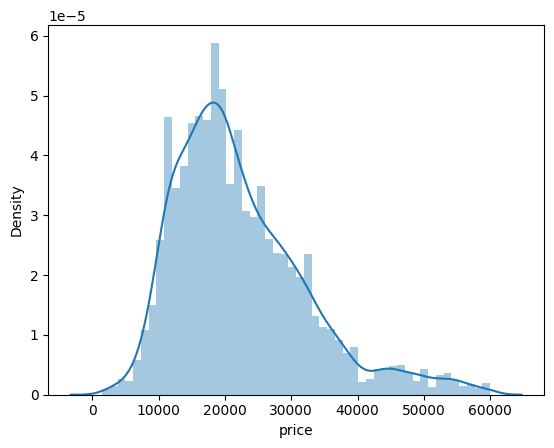

In [138]:
sns.distplot(yenidf["price"])

In [139]:
df = yenidf
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,10562.000000,10562.000000,10562.000000,10562.000000,10562.000000,10562.000000
mean,2017.079909,22331.520640,25012.921038,125.730449,50.977978,1.912412
std,2.166547,10079.220417,23540.812433,67.199298,12.837371,0.571433
min,1997.000000,1490.000000,5.000000,0.000000,18.900000,0.000000
25%,2016.000000,15000.000000,6000.000000,125.000000,40.900000,1.500000
50%,2017.000000,20000.000000,19298.000000,145.000000,49.600000,2.000000
75%,2019.000000,27847.750000,36715.000000,145.000000,58.900000,2.000000
max,2020.000000,59995.000000,323000.000000,580.000000,188.300000,6.300000


In [140]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
7221,A5,2020,59995,Semi-Auto,2000,Diesel,150,40.9,3.0
222,Q7,2019,59995,Automatic,10,Diesel,145,33.2,3.0
5129,Q7,2019,59990,Automatic,3988,Diesel,145,32.8,3.0
4100,RS4,2019,59990,Automatic,5121,Petrol,145,29.1,2.9
4669,Q7,2020,59990,Semi-Auto,799,Diesel,145,33.2,3.0


In [141]:
df = df.drop(["model","transmission","fuelType"], axis=1) #string değerleri DataFrameden çıkardık
df.head()

,year,price,mileage,tax,mpg,engineSize
7221,2020,59995,2000,150,40.9,3.0
222,2019,59995,10,145,33.2,3.0
5129,2019,59990,3988,145,32.8,3.0
4100,2019,59990,5121,145,29.1,2.9
4669,2020,59990,799,145,33.2,3.0


In [142]:
y = df["price"].values
x = df.drop("price", axis=1).values

In [143]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=10)

In [144]:
scaler = MinMaxScaler()

scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [145]:
model = Sequential()

model.add(Dense(12,activation = "relu"))
model.add(Dense(12,activation = "relu"))
model.add(Dense(12,activation = "relu"))
model.add(Dense(12,activation = "relu"))
model.add(Dense(1))

model.compile(optimizer="adam", loss="mse")

In [146]:
model.fit(x=x_train, y=y_train, validation_data=(x_test, y_test), batch_size=250, epochs=300)

Epoch 1/300
29/29 [==============================] - 2s 12ms/step - loss: 593823808.0000 - val_loss: 613323392.0000
Epoch 2/300
29/29 [==============================] - 0s 6ms/step - loss: 593788288.0000 - val_loss: 613263808.0000
Epoch 3/300
29/29 [==============================] - 0s 6ms/step - loss: 593689280.0000 - val_loss: 613091392.0000
Epoch 4/300
29/29 [==============================] - 0s 5ms/step - loss: 593394624.0000 - val_loss: 612594688.0000
Epoch 5/300
29/29 [==============================] - 0s 5ms/step - loss: 592605056.0000 - val_loss: 611351168.0000
Epoch 6/300
29/29 [==============================] - 0s 6ms/step - loss: 590763520.0000 - val_loss: 608577792.0000
Epoch 7/300
29/29 [==============================] - 0s 6ms/step - loss: 586897856.0000 - val_loss: 603060608.0000
Epoch 8/300
29/29 [==============================] - 0s 6ms/step - loss: 579602112.0000 - val_loss: 593121728.0000
Epoch 9/300
29/29 [==============================] - 0s 6ms/step - loss: 567007

<Axes: >

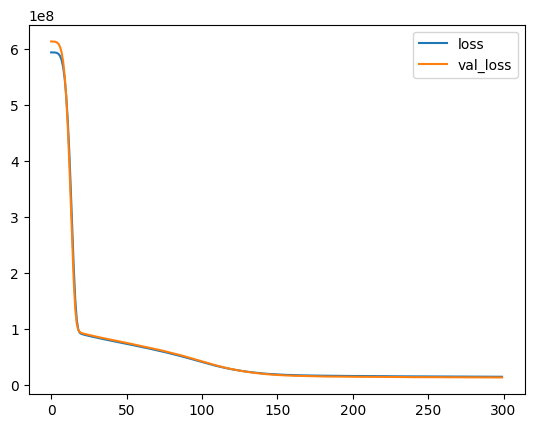

In [147]:
kayip_veri = pd.DataFrame(model.history.history)
kayip_veri.plot()

In [148]:
tahmin_dizisi = model.predict(x_test)
tahmin_dizisi

109/109 [==============================] - 0s 2ms/step


array([[27396.947],
       [22798.623],
       [23478.361],
       ...,
       [ 7363.167],
       [19806.303],
       [12548.931]], dtype=float32)

In [149]:
mean_absolute_error(y_test, tahmin_dizisi) #hata payımız

2503.7156000536747

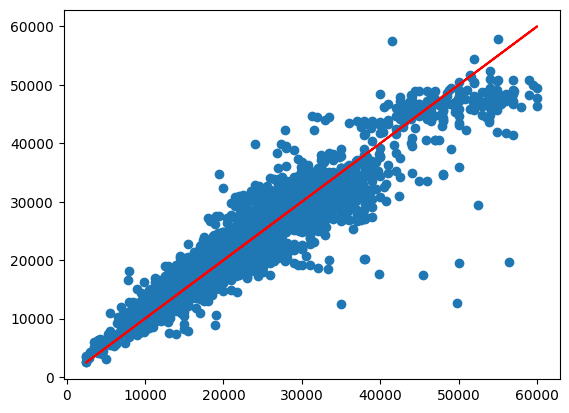

In [150]:
plt.scatter(y_test, tahmin_dizisi)
plt.plot(y_test, y_test,"r")